In [4]:
import matplotlib.pyplot as plt
import torch

# Workflow
- 1: data (prepare and load)

- 2: build model

- 3: fitting the model to data (training model)

- 4: made predictions, evaluate a model (make an inference)

- 5: save and load a model

- 6: put all together

## 1. Data (single input dim linear regression)

In [24]:
# known parameters, we are trying to get these

weight = 0.7
bias = 0.3

# inputs
X = torch.arange(0, 10, 0.2)
Y = weight * X + bias
X, Y

(tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 1.0000, 1.2000, 1.4000, 1.6000,
         1.8000, 2.0000, 2.2000, 2.4000, 2.6000, 2.8000, 3.0000, 3.2000, 3.4000,
         3.6000, 3.8000, 4.0000, 4.2000, 4.4000, 4.6000, 4.8000, 5.0000, 5.2000,
         5.4000, 5.6000, 5.8000, 6.0000, 6.2000, 6.4000, 6.6000, 6.8000, 7.0000,
         7.2000, 7.4000, 7.6000, 7.8000, 8.0000, 8.2000, 8.4000, 8.6000, 8.8000,
         9.0000, 9.2000, 9.4000, 9.6000, 9.8000]),
 tensor([0.3000, 0.4400, 0.5800, 0.7200, 0.8600, 1.0000, 1.1400, 1.2800, 1.4200,
         1.5600, 1.7000, 1.8400, 1.9800, 2.1200, 2.2600, 2.4000, 2.5400, 2.6800,
         2.8200, 2.9600, 3.1000, 3.2400, 3.3800, 3.5200, 3.6600, 3.8000, 3.9400,
         4.0800, 4.2200, 4.3600, 4.5000, 4.6400, 4.7800, 4.9200, 5.0600, 5.2000,
         5.3400, 5.4800, 5.6200, 5.7600, 5.9000, 6.0400, 6.1800, 6.3200, 6.4600,
         6.6000, 6.7400, 6.8800, 7.0200, 7.1600]))

In [33]:
#train and test splits
length = len(X)
split = int(len(X) * 0.8)
X_train, Y_train = X[:split], Y[:split]
X_test, Y_test = X[split:], Y[split:]

print(X_train, Y_train, X_test, Y_test)
print(len(X_train), len(Y_train), len(X_test), len(Y_test))

tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 1.0000, 1.2000, 1.4000, 1.6000,
        1.8000, 2.0000, 2.2000, 2.4000, 2.6000, 2.8000, 3.0000, 3.2000, 3.4000,
        3.6000, 3.8000, 4.0000, 4.2000, 4.4000, 4.6000, 4.8000, 5.0000, 5.2000,
        5.4000, 5.6000, 5.8000, 6.0000, 6.2000, 6.4000, 6.6000, 6.8000, 7.0000,
        7.2000, 7.4000, 7.6000, 7.8000]) tensor([0.3000, 0.4400, 0.5800, 0.7200, 0.8600, 1.0000, 1.1400, 1.2800, 1.4200,
        1.5600, 1.7000, 1.8400, 1.9800, 2.1200, 2.2600, 2.4000, 2.5400, 2.6800,
        2.8200, 2.9600, 3.1000, 3.2400, 3.3800, 3.5200, 3.6600, 3.8000, 3.9400,
        4.0800, 4.2200, 4.3600, 4.5000, 4.6400, 4.7800, 4.9200, 5.0600, 5.2000,
        5.3400, 5.4800, 5.6200, 5.7600]) tensor([8.0000, 8.2000, 8.4000, 8.6000, 8.8000, 9.0000, 9.2000, 9.4000, 9.6000,
        9.8000]) tensor([5.9000, 6.0400, 6.1800, 6.3200, 6.4600, 6.6000, 6.7400, 6.8800, 7.0200,
        7.1600])
40 40 10 10


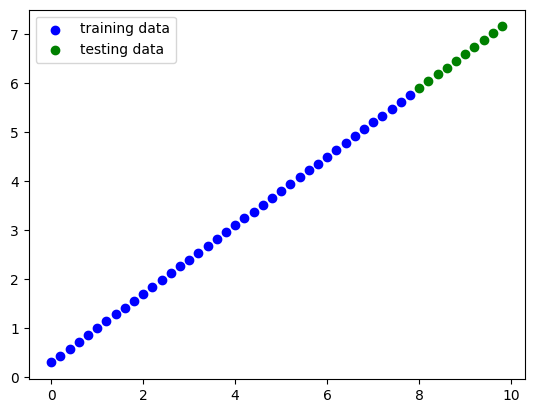

In [ ]:
# Visualize data

def visualize(X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, predictions=None):
    plt.scatter(X_train, Y_train, c='blue', label='training data')
    plt.scatter(X_test, Y_test, c='green', label='testing data')

    if predictions is not None:
        plt.scatter(X_test, predictions, c='red', label='predictions')
    
    plt.legend()

visualize()

rand_weight: tensor([0.3158])
rand_bias: tensor([0.8605])
predictions


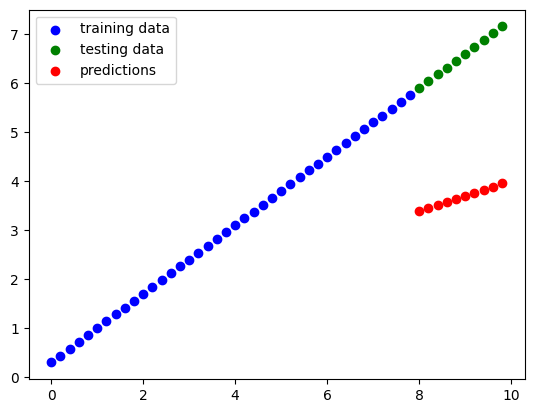

In [72]:
#plot predictions w/ random weight, bias
rand_weight = torch.rand(size=[1])
rand_bias = torch.rand(size=[1])
print(f'rand_weight: {rand_weight}')
print(f'rand_bias: {rand_bias}')

predictions = rand_weight * X_test + rand_bias

visualize(predictions=predictions)

## 2. Build model

In [78]:
torch.rand(2, 2)

tensor([[0.6065, 0.4751],
        [0.5951, 0.3614]])

In [74]:
from torch import nn

In [80]:
#Single Linear Regression Model

class SingleLinearRegressionModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
    
    def forward(self, X) -> torch.Tensor:
        return self.weights * X + self.bias


In [94]:
SEED = 42
torch.manual_seed(seed=SEED)

model = SingleLinearRegressionModel()
print(model)
print(list(model.parameters()))

state_dict = dict(model.state_dict())

SingleLinearRegressionModel()
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


False
predictions


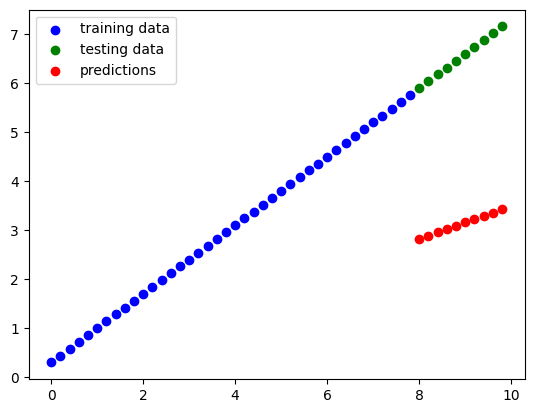

In [99]:
#Test w/ model's current parameters
#MAKE inferences with torch.inference_mode

with torch.inference_mode(): #in inference mode, machine doesn't need resources such as requires_grad
    preds = model(X_test)
print(preds.requires_grad)
visualize(predictions=preds)

# 3. Train Model

move from unknown parameters (ours are random rn), to known parameters

from a poor representation of data to a more accurate representation of the data

Need to get loss function in order to use gradient descent to minimize the loss function

loss function/cost function/criterion

Train:
* **Loss Function:** funciton to measure inaccuracy of your model's outputs (from Torch.nn's loss functions)
* **Optimizer:** Adjusts the model's parameters to minimize loss function

**Learning Rate:**
*THe smaller the learning rate, the smaller the changes in the model parameters, (changes are more precise)
*The bigger the learning rate, the less precise the changes in the model parameters. Larger changes in parameters

Our current model only has 2 parameters, one weight and one bias


for pytorch:
* Training Loop
* Testing Loop